In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
from PIL import Image
import shutil

In [3]:
def gen(path,i):
    X=[]
    Y=[]
    n=os.listdir(path)
    for p in n:
        img=Image.open(path+'/'+p)
        img=np.array(img)
        X.append(img)
        Y.append(i)
    return X,Y

In [4]:
os.makedirs('data')

In [5]:
srcs=[
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/b/balcony/interior','balcony'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/b/bathroom','bathroom'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/b/bedroom','bedroom'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/b/boardwalk','boardwalk'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/c/construction_site','site'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/g/garage/indoor','garage'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/h/highway','highway'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/k/kitchen','kitchen'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/l/lake/natural','lake'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/m/market/outdoor','market'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/t/train_station/platform','train'),
    ('/kaggle/input/places2-mit-dataset/train_256_places365standard/data_256/s/street','street'),
]

In [6]:
des='/kaggle/working/data'
#os.makedirs(des,dirs_exist_ok=True)

In [7]:
for source_folder,folder_name in srcs:
    dest = os.path.join(des, folder_name)
    shutil.copytree(source_folder, dest, dirs_exist_ok=True)

In [8]:
len(os.listdir(des))

12

In [9]:
os.listdir(des)

['bedroom',
 'market',
 'balcony',
 'train',
 'bathroom',
 'site',
 'street',
 'lake',
 'boardwalk',
 'garage',
 'highway',
 'kitchen']

In [10]:
def find_empty_folders(directory):
    empty_folders = []

    for root, dirs, files in os.walk(directory):
        if not dirs and not files:
            empty_folders.append(root)

    return empty_folders

In [11]:
empty_folders = find_empty_folders(des)

In [12]:
print("Empty folders in {}: {}".format(des, empty_folders))

Empty folders in /kaggle/working/data: []


In [13]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("float32")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
!pip install split_folders
import splitfolders

In [15]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')
splitfolders.ratio(des,output = "output",seed = 42,ratio = (0.80,.1,.1))

Copying files: 60000 files [00:08, 6726.60 files/s]


In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dir="./output/train"
test_dir="./output/test"
val_dir="./output/val"
train_data=image_dataset_from_directory(train_dir,batch_size=32,image_size=(224,224),label_mode='categorical',shuffle=True,seed=42)
test_data=image_dataset_from_directory(test_dir,batch_size=32,image_size=(224,224),label_mode='categorical',shuffle=False,seed=42)
val_data=image_dataset_from_directory(val_dir,batch_size=32,image_size=(224,224),label_mode='categorical',shuffle=False,seed=42)

Found 48000 files belonging to 12 classes.
Found 6000 files belonging to 12 classes.
Found 6000 files belonging to 12 classes.


In [17]:
class_names = train_data.class_names
class_image_counts = {class_name: 0 for class_name in class_names}
for images, labels in train_data:
    for label in labels.numpy():
        class_name = class_names[label.argmax()]
        class_image_counts[class_name] += 1
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")

Class: balcony, Number of Images: 4000
Class: bathroom, Number of Images: 4000
Class: bedroom, Number of Images: 4000
Class: boardwalk, Number of Images: 4000
Class: garage, Number of Images: 4000
Class: highway, Number of Images: 4000
Class: kitchen, Number of Images: 4000
Class: lake, Number of Images: 4000
Class: market, Number of Images: 4000
Class: site, Number of Images: 4000
Class: street, Number of Images: 4000
Class: train, Number of Images: 4000


In [18]:
class_names=train_data.class_names
class_count=len(class_names)
print(len(class_names))
print(class_names)
train_data = train_data.prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.prefetch(buffer_size = tf.data.AUTOTUNE)

12
['balcony', 'bathroom', 'bedroom', 'boardwalk', 'garage', 'highway', 'kitchen', 'lake', 'market', 'site', 'street', 'train']


In [19]:
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
model_name='EfficientNetB2'
base_model=tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet",input_shape=(224,224,3), pooling='max') 
x=base_model.output
#x=layers.GlobalAvgPool2D(name = "pooling_layer")(x)
x=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x=Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dense(128, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=42)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adamax(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

31790344/31790344 [==============================] - 0s 0us/step


In [20]:
history=model.fit(train_data,epochs = 10,validation_data = val_data)

Epoch 1/10


2023-11-14 07:47:54.569519: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1500/1500 [==============================] - 538s 320ms/step - loss: 3.4904 - accuracy: 0.8254 - val_loss: 0.8482 - val_accuracy: 0.9082
Epoch 2/10
1500/1500 [==============================] - 473s 315ms/step - loss: 0.7195 - accuracy: 0.9090 - val_loss: 0.6177 - val_accuracy: 0.9068
Epoch 3/10
1500/1500 [==============================] - 477s 318ms/step - loss: 0.5102 - accuracy: 0.9402 - val_loss: 0.5536 - val_accuracy: 0.9102
Epoch 4/10
1500/1500 [==============================] - 472s 315ms/step - loss: 0.4028 - accuracy: 0.9569 - val_loss: 0.5268 - val_accuracy: 0.9132
Epoch 5/10
1500/1500 [==============================] - 477s 318ms/step - loss: 0.3343 - accuracy: 0.9690 - val_loss: 0.5277 - val_accuracy: 0.9082
Epoch 6/10
1500/1500 [==============================] - 477s 318ms/step - loss: 0.2859 - accuracy: 0.9769 - val_loss: 0.5278 - val_accuracy: 0.9110
Epoch 7/10
1500/1500 [==============================] - 478s 319ms/step - loss: 0.2571 - accuracy: 0.9800 - val_loss: 0.528

In [21]:
pred_probs = model.predict(test_data)
pred_classes = pred_probs.argmax(axis =1)
y_labels = []
for image,label in test_data.unbatch():
    y_labels.append(label.numpy().argmax())
from sklearn.metrics import classification_report
print("Classification report\n",classification_report(y_labels,pred_classes))

188/188 [==============================] - 13s 56ms/step
Classification report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       500
           1       0.94      0.91      0.92       500
           2       0.98      0.95      0.96       500
           3       0.86      0.90      0.88       500
           4       0.93      0.95      0.94       500
           5       0.91      0.92      0.91       500
           6       0.89      0.95      0.92       500
           7       0.93      0.90      0.92       500
           8       0.96      0.88      0.92       500
           9       0.85      0.84      0.85       500
          10       0.91      0.89      0.90       500
          11       0.94      0.96      0.95       500

    accuracy                           0.91      6000
   macro avg       0.92      0.91      0.91      6000
weighted avg       0.92      0.91      0.91      6000



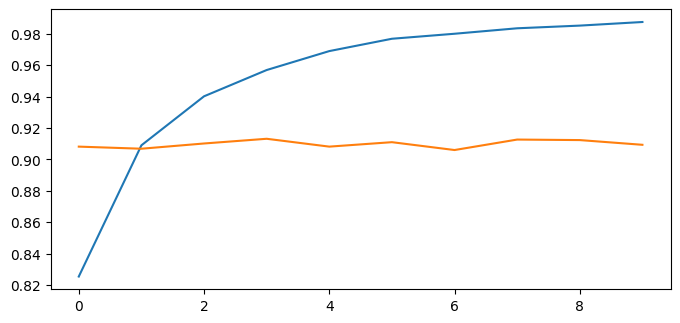

In [22]:
acc=history.history["accuracy"]
loss=history.history["loss"]
val_acc=history.history["val_accuracy"]
val_loss=history.history["val_loss"]
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

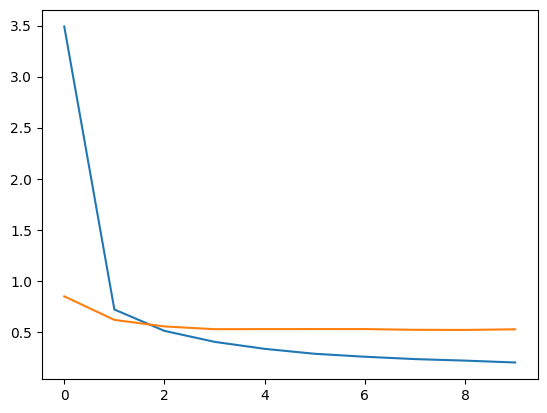

In [23]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

In [24]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_labels,pred_classes
                            )
print(confusion)

[[464   4   2  10   1   2   6   0   0   8   1   2]
 [  3 456   4   0   3   0  29   0   1   2   1   1]
 [  4   8 474   0   5   0   7   1   0   1   0   0]
 [ 12   0   1 449   1   6   1  18   1   5   2   4]
 [  4   2   1   1 473   1   6   0   1   5   4   2]
 [  4   0   0   6   1 460   0   3   1  14   9   2]
 [  0  12   1   0   6   0 477   0   2   2   0   0]
 [  7   1   0  28   0   7   0 451   0   4   2   0]
 [  3   1   0   5   2   2  10   4 438  20  14   1]
 [ 15   3   0  12  17   9   0   6   0 422   8   8]
 [  4   0   0   6   1  14   0   0  13  10 444   8]
 [  3   0   0   3   1   6   0   1   0   4   4 478]]


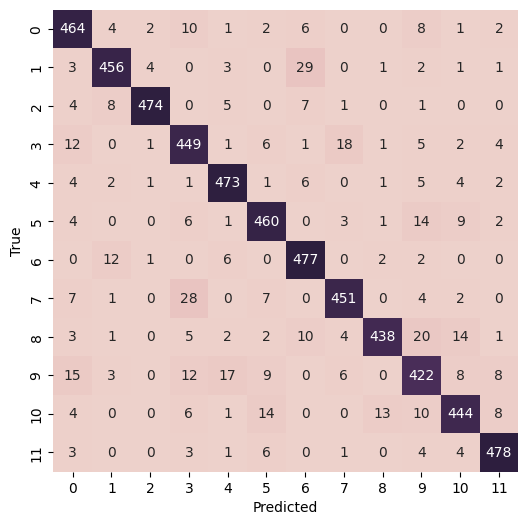

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap=cmap, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion matrix.png')